# Time Series Analysis of NAICS : Monthly employment data series from 1997 to 2018

## Data Import and cleaning

In [1]:
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get all csv files in data folder
files = glob.glob('./data/*.csv')

def create_df(digit:int) -> pd.core.frame.DataFrame :
    """
    Create a sorted dataframe for selected digit using files already in data folder that match with '_{digit}NAICS'
    Parameters
    ----------    
    digit : int
        Number of digit of NAICS file we want to retrieve
      
    files : list
        Global parameter, list of csv files in data folder.
        
    Returns    
    -------    
    pd.core.frame.DataFrame
        sorted dataframe of NAICS with n digits.      
    """
    global files
    return pd.concat([pd.read_csv(file) for file in files if re.search("_{}NAICS".format(digit), file)]).sort_values(by=['SYEAR', 'SMTH'])

In [3]:
df_2_digit = create_df(2)
df_3_digit = create_df(3)
df_4_digit = create_df(4)

In [4]:
df_2_digit.head(25)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000
5,1997,1,Educational services [61],118750
6,1997,1,Finance and insurance [52],77500
7,1997,1,Health care and social assistance [62],183000
8,1997,1,Information and cultural industries [51],40500
9,1997,1,Management of companies and enterprises [55],1750


In [5]:
df_3_digit.head(25)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000
5,1997,1,"Amusement, gambling and recreation industries[...",20000
6,1997,1,Animal production and aquaculture[112],13500
7,1997,1,Beverage and tobacco product manufacturing[312],2500
8,1997,1,Broadcasting (except Internet)[515],4750
9,1997,1,Building material and garden equipment and sup...,16000


In [6]:
df_4_digit.head(25)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250
5,1997,1,1119,250
6,1997,1,1121,8250
7,1997,1,1122,500
8,1997,1,1123,1500
9,1997,1,1124,500


In [7]:
def create_date(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """
    Create the date column in the selected dataset then remove unused columns 
    Parameters
    ----------    
    df : pd.core.frame.DataFrame
        the dataframe we want to change
      
    Returns    
    -------    
    pd.core.frame.DataFrame
        the input dataframe with ['DATE'] and without ['SYEAR', 'SMONTH'] columns     
    """
    df['DATE'] = pd.to_datetime(df['SYEAR'].astype('str') + df['SMTH'].astype('str'), format='%Y%m')
    df.drop(columns=['SYEAR', 'SMTH'], inplace=True)
    return df

In [8]:
df_2_digit = create_date(df_2_digit)
df_3_digit = create_date(df_3_digit)
df_4_digit = create_date(df_4_digit)

In [9]:
df_2_digit.head()

,NAICS,_EMPLOYMENT_,DATE
0,Accommodation and food services [72],129250,1997-01-01
1,"Administrative and support, waste management a...",58500,1997-01-01
2,"Agriculture, forestry, fishing and hunting [11]",62250,1997-01-01
3,"Arts, entertainment and recreation [71]",38750,1997-01-01
4,Construction [23],118000,1997-01-01


In [10]:
df_3_digit.head()

,NAICS,_EMPLOYMENT_,DATE
0,Aboriginal public administration[914],500,1997-01-01
1,Accommodation services[721],24000,1997-01-01
2,Administrative and support services[561],56750,1997-01-01
3,Air transportation[481],17000,1997-01-01
4,Ambulatory health care services[621],40000,1997-01-01


In [11]:
df_4_digit.head()

,NAICS,_EMPLOYMENT_,DATE
0,1100,3500,1997-01-01
1,1111,250,1997-01-01
2,1112,500,1997-01-01
3,1113,2250,1997-01-01
4,1114,5250,1997-01-01


In [12]:
def create_code(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """
    Create the code column in the selected dataset 
    Parameters
    ----------    
    df : pd.core.frame.DataFrame
        the dataframe we want to change
      
    Returns    
    -------    
    pd.core.frame.DataFrame
        the input dataframe with ['CODE']     
    """
    df['CODE'] = df['NAICS'].astype('str').str.extract('(\d+)')
    df['NAICS'] = df['NAICS'].astype('str').str.split('[').str.get(0)
    return df

df_2_digit = create_code(df_2_digit)
df_3_digit = create_code(df_3_digit)
df_4_digit = create_code(df_4_digit)

df_2_digit.head()

,NAICS,_EMPLOYMENT_,DATE,CODE
0,Accommodation and food services,129250,1997-01-01,72
1,"Administrative and support, waste management a...",58500,1997-01-01,56
2,"Agriculture, forestry, fishing and hunting",62250,1997-01-01,11
3,"Arts, entertainment and recreation",38750,1997-01-01,71
4,Construction,118000,1997-01-01,23


In [13]:
df_3_digit.head()

,NAICS,_EMPLOYMENT_,DATE,CODE
0,Aboriginal public administration,500,1997-01-01,914
1,Accommodation services,24000,1997-01-01,721
2,Administrative and support services,56750,1997-01-01,561
3,Air transportation,17000,1997-01-01,481
4,Ambulatory health care services,40000,1997-01-01,621


In [14]:
df_4_digit.head()

,NAICS,_EMPLOYMENT_,DATE,CODE
0,1100,3500,1997-01-01,1100
1,1111,250,1997-01-01,1111
2,1112,500,1997-01-01,1112
3,1113,2250,1997-01-01,1113
4,1114,5250,1997-01-01,1114


In [15]:
LMO = pd.read_excel('./data/LMO_Detailed_Industries_by_NAICS.xlsx')
LMO.head(6)

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213


In [16]:
def match_industry(df: pd.core.frame.DataFrame) -> list:
    """
    Get the matched industry code for each row   
    Parameters
    ----------    
    df : pd.core.frame.DataFrame
        the dataframe we want to change
        
    LMO: global values
      
    Returns    
    -------    
    list
        the list of code of industry in LMO dataset     
    """
    global LMO
    codes = LMO['NAICS'].astype('str').str.replace('.', '').str.replace('&', ',').str.strip().str.extract('(\d+)', expand=True).values.ravel()
    match = []
    for i, row in df.iterrows(): 
        selected = None
        for code in codes:
            if not isinstance(row['CODE'], str) and row['CODE'] != None:
                print(row['CODE'])
            if row['CODE'][:len(str(code))] == str(code) and code not in [None, np.nan]:
                selected = code
        if selected is None:
            match.append(np.nan)
        else:
            match.append(selected)
            
    return match

df_4_digit['CODE'] = match_industry(df_4_digit)
print(df_4_digit['CODE'].head(20))

0     NaN
1     111
2     111
3     111
4     111
5     111
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    113
13    113
14    114
15    114
16    115
17    115
18    115
19    NaN
Name: CODE, dtype: object


In [17]:
df_4_digit.drop(df_4_digit[df_4_digit['CODE'].isna()].index, inplace=True)
df_4_digit.drop(columns='NAICS', inplace=True)
df_4_digit.head() 

,_EMPLOYMENT_,DATE,CODE
1,250,1997-01-01,111
2,500,1997-01-01,111
3,2250,1997-01-01,111
4,5250,1997-01-01,111
5,250,1997-01-01,111


In [18]:
codes = LMO['NAICS'].astype('str').str.replace('.', '').str.replace('&', ',').str.strip().str.extract('(\d+)', expand=True).values
lmo_dict={row['LMO_Detailed_Industry']: codes[i] for i,row in LMO.iterrows()}

industries = []
for i, row in df_4_digit.iterrows():
    for name, codes in lmo_dict.items():
        if row['CODE'] in codes:
            industries.append(name)

df_4_digit['NAICS'] = industries

In [19]:
df_4_digit.groupby(['NAICS','DATE']).agg({'_EMPLOYMENT_':sum})

_EMPLOYMENT_
NAICS                      DATE                    
Accommodation services     1997-01-01         24250
                           1997-02-01         24250
                           1997-03-01         28000
                           1997-04-01         30000
                           1997-05-01         33750
...                                             ...
Wood product manufacturing 2018-12-01         24250
                           2019-08-01         13250
                           2019-10-01             0
                           2019-11-01             0
                           2019-12-01             0

[6620 rows x 1 columns]

### Industries Employment


<AxesSubplot:xlabel='Employments', ylabel='Industry'>

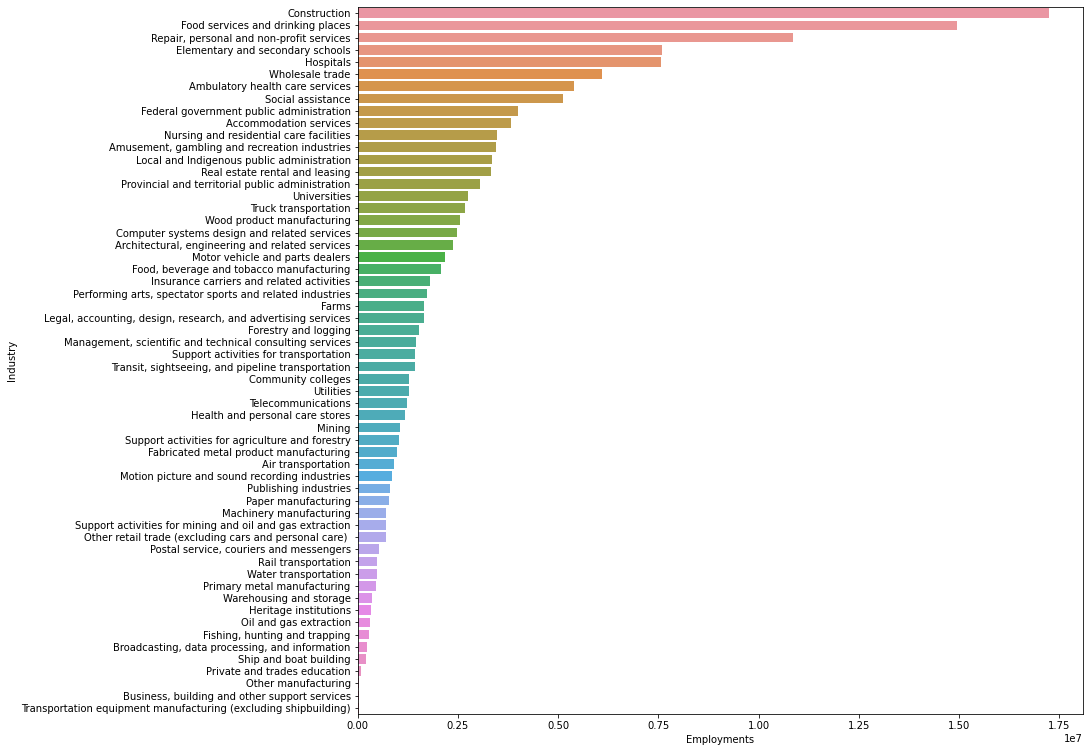

In [20]:
total_counts = df_4_digit.groupby('NAICS')['_EMPLOYMENT_'].sum().sort_values(ascending=False)
total_df = pd.DataFrame({'Industry':total_counts.index, 'Employments':total_counts.values})
plt.figure(figsize=(13,13))
sns.barplot(x='Employments', y='Industry', data = total_df)

### The year with the most employment

<AxesSubplot:xlabel='Year', ylabel='Employments'>

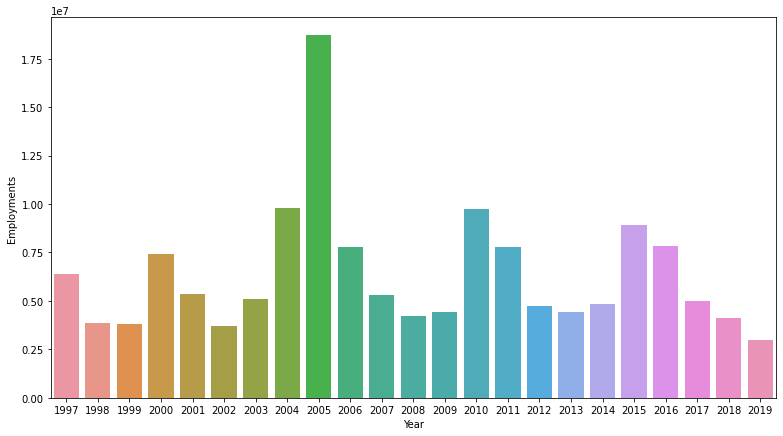

In [21]:
employment_by_year = df_4_digit.groupby(df_4_digit.DATE.dt.year)['_EMPLOYMENT_'].sum().sort_values(ascending=False)
total_df = pd.DataFrame({'Year':employment_by_year.index, 'Employments':employment_by_year.values})
plt.figure(figsize=(13,7))
sns.barplot(x='Year', y='Employments', data = total_df)

## Time Series

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabe

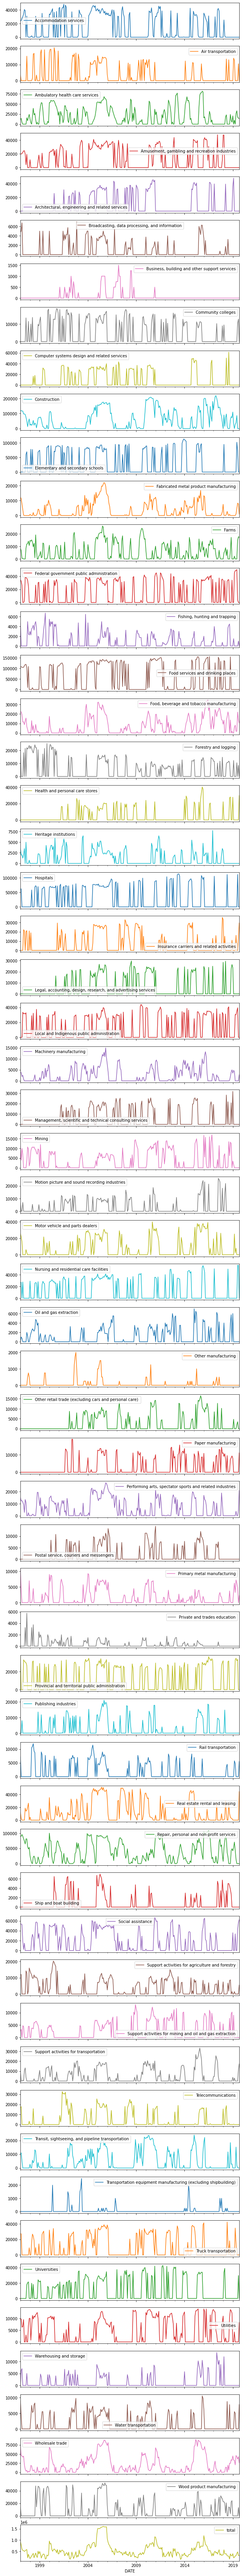

In [22]:
data = pd.DataFrame(df_4_digit.reset_index().groupby(['NAICS', 'DATE'], as_index=False)['_EMPLOYMENT_'].sum())
data = data.pivot('DATE', 'NAICS', '_EMPLOYMENT_')
data['total'] = data.sum(axis=1)
data = data.iloc[:-3]
data.index.freq = 'MS'
data.fillna(0, inplace=True)
data.plot(subplots=True, figsize=(10, 120))

### Global employability analysis

<AxesSubplot:xlabel='DATE'>

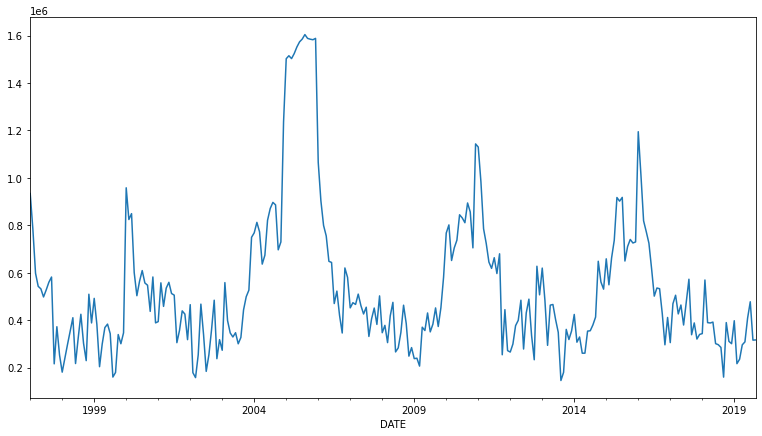

In [23]:
data['total'].plot(figsize=(13, 7))

### Distribution of employment in construction

<AxesSubplot:ylabel='Construction'>

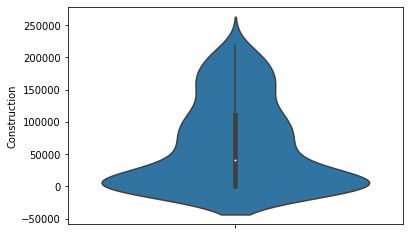

In [24]:
sns.violinplot(y=data['Construction'])

<AxesSubplot:xlabel='DATE'>

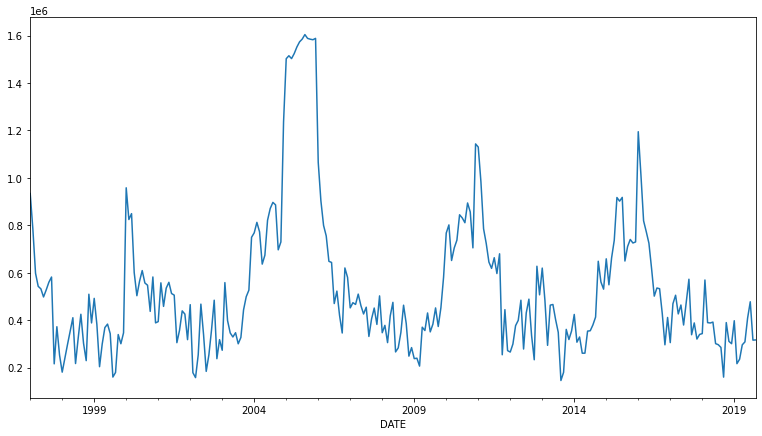

In [25]:
data['total'].plot(figsize=(13, 7))

### Comparing the top 5 industries

<AxesSubplot:xlabel='DATE'>

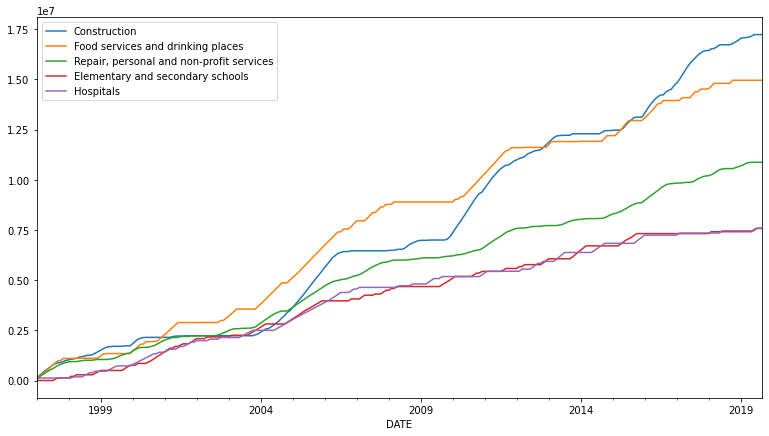

In [26]:
data['Construction'].cumsum().plot(figsize=(13, 7),legend=True)
data['Food services and drinking places'].cumsum().plot(figsize=(13, 7), legend=True)
data['Repair, personal and non-profit services'].cumsum().plot(figsize=(13, 7), legend=True)
data['Elementary and secondary schools'].cumsum().plot(figsize=(13, 7),legend=True)
data['Hospitals'].cumsum().plot(figsize=(13, 7), legend=True)